In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [3]:
from helpers import load_data

# load dataset
x, y = load_data()

In [4]:
y.shape, x.shape

((50,), (50,))

In [5]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)




In [6]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    train_err=[]
    test_err=[]
    for i in k_indices:
        
        x_train, y_train = np.delete(x,i), np.delete(y,i)
        x_test, y_test = x[i], y[i]
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form data with polynomial degree: TODO
        # ***************************************************

        phi_test = build_poly(x_test, degree)
        phi_train = build_poly(x_train, degree)
    
        # ***************************************************

        # INSERT YOUR CODE HERE
        # ridge regression: TODO
        # ***************************************************

        w_opt, mse_tr = ridge_regression(y_train, phi_train, lambda_)
    
        # ***************************************************
        # INSERT YOUR CODE HERE
        # calculate the loss for train and test data: TODO
        # ***************************************************
        
        mse_te = compute_mse(y_test, phi_test, w_opt)
        rmse_tr, rmse_te= (2*mse_tr)**(0.5), (2*mse_te)**(0.5)
        train_err.append(rmse_tr)
        test_err.append(rmse_te)
    loss_tr = np.mean(train_err)
    loss_te = np.mean(test_err)
    
    return loss_tr, loss_te

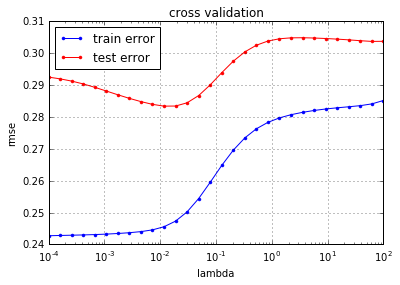

In [7]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 2000
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 2, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    
    for lambda_ in lambdas:
        loss_tr, loss_te = cross_validation(y, x, k_indices, k_fold, lambda_, degree)
        rmse_tr.append(loss_tr)
        rmse_te.append(loss_te)
    
    # ***************************************************    
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

degree =  2


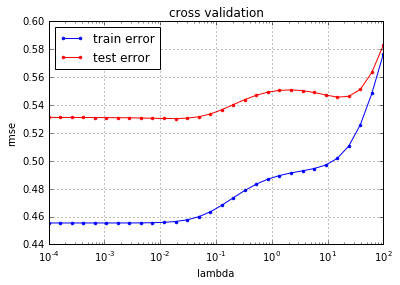

degree =  3


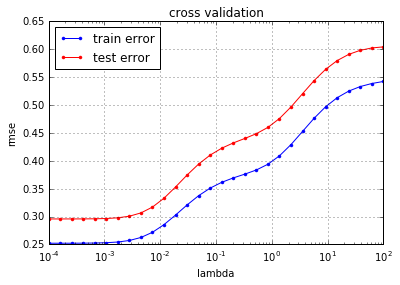

degree =  4


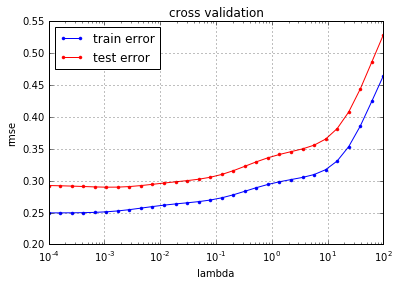

degree =  5


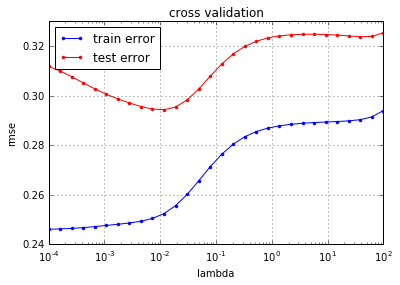

degree =  6


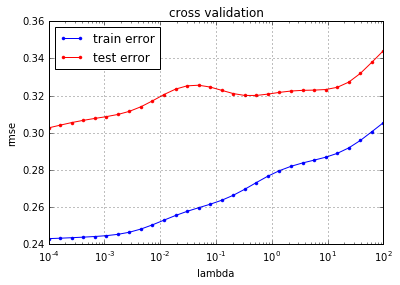

degree =  7


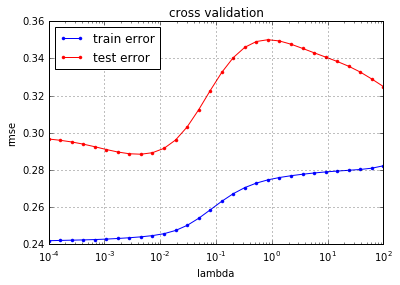

degree =  8


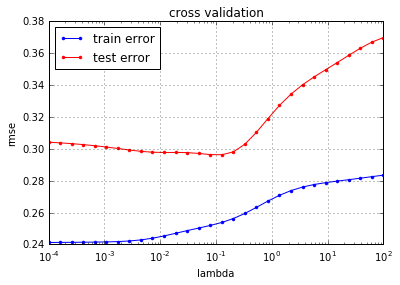

degree =  9


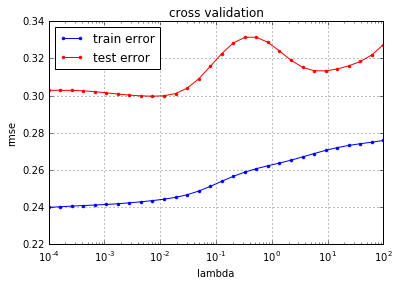

degree =  10


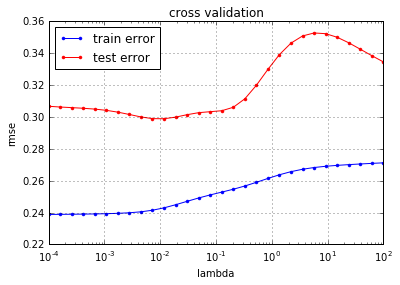

In [8]:
def discuss_degree():
    seed = 1
    degree = np.linspace(2,10,9, dtype= int)
    k_fold = 4
    lambdas = np.logspace(-4, 2, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
   
    RMSE_TR = np.zeros((len(degree),len(lambdas)))
    RMSE_TE = np.zeros((len(degree),len(lambdas)))
    
    for ind, deg in enumerate(degree):
        rmse_tr = []
        rmse_te = []
        for lambda_ in lambdas:
            
            loss_tr, loss_te = cross_validation(y, x, k_indices, k_fold, lambda_, deg)
            rmse_tr.append(loss_tr)
            rmse_te.append(loss_te)
        
        RMSE_TR[ind,:] = rmse_tr 
        RMSE_TE[ind,:] = rmse_te
        print('degree = ', deg)
        cross_validation_visualization(lambdas, RMSE_TR[ind], RMSE_TE[ind])
        
discuss_degree()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

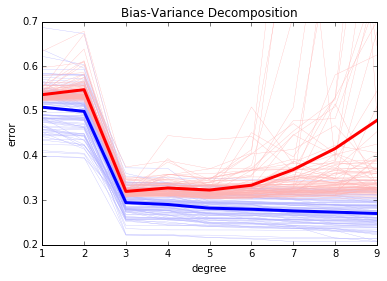

In [18]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        for index_deg, deg in enumerate(degrees):
            
            x_train, y_train, x_test, y_test = split_data(x, y, ratio_train, seed)
            phi_train = build_poly(x_train, deg)
            phi_test = build_poly(x_test, deg)
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
            
            w, mse_tr = least_squares(y_train, phi_train)
            mse_te = compute_mse(y_test, phi_test, w)
            
            # PROBLEME AVEC LA MSE_TEST
            
            #print(mse_te)
            rmse_tr[index_seed, index_deg] = (2*mse_tr)**(0.5)
            rmse_te[index_seed, index_deg] = (2*mse_te)**(0.5)
            

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()